,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


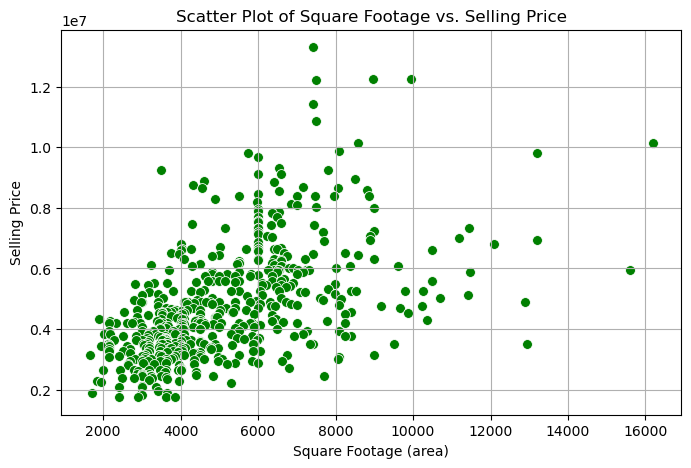

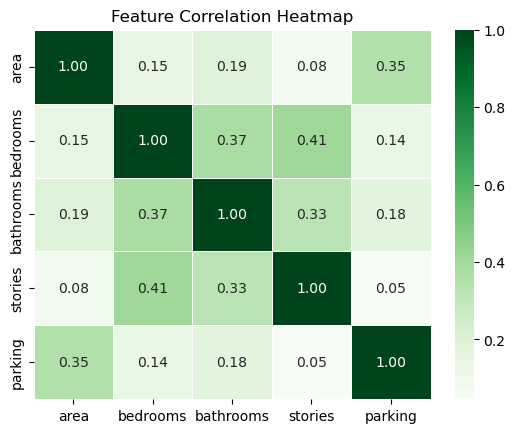

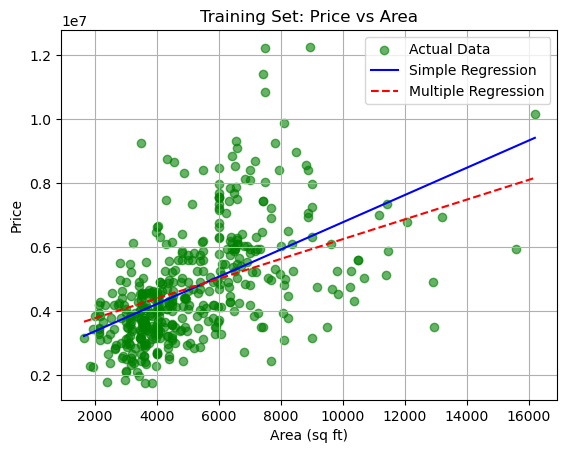

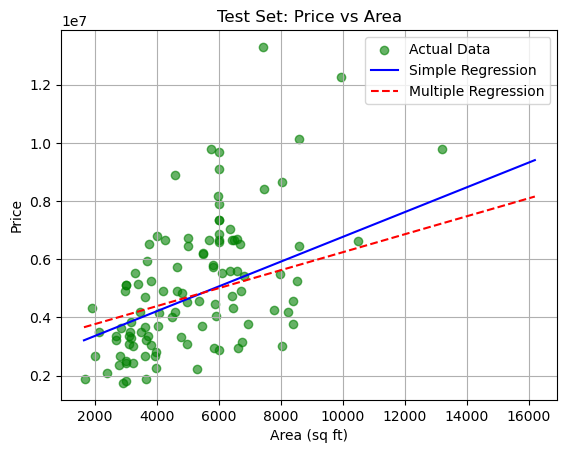

Simple Model(Square Footage vs Price): 0.2729
Multi Model([Bedrooms, location, square,...] vs Price): 0.5464
Model accuracy improved by adding other features for prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("../Housing.csv")
display(df.head())

# Scatter plot of area vs. price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["area"], y=df["price"], c = 'green', s = 50)
plt.xlabel("Square Footage (area)")
plt.ylabel("Selling Price")
plt.title("Scatter Plot of Square Footage vs. Selling Price")
plt.grid()
plt.show()

# Simple Linear Regression (Using only area)
X = df[["area"]]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_simple = r2_score(y_test, y_pred)

# Multiple Linear Regression (Using additional features)
X_multi = df[["area", "bedrooms", "bathrooms", "stories", "parking"]]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = model_multi.predict(X_test_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

# Correlation Heatmap for Multicollinearity Check
sns.heatmap(X_multi.corr(), annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

X_range = pd.DataFrame(np.linspace(X.min(), X.max(), 100), columns=["area"])
y_pred_simple = model.predict(X_range)

# Multiple regression predictions (keeping other features at their mean)
X_range_multi = X_range.assign(**df[["bedrooms", "bathrooms", "stories", "parking"]].mean())
y_pred_multi = model_multi.predict(X_range_multi)

# Function for plotting both models
def plot_regression(X, y, title):
    plt.scatter(X, y, color='green', alpha = 0.6,  label="Actual Data")
    plt.plot(X_range, y_pred_simple, color='blue', label="Simple Regression")
    plt.plot(X_range, y_pred_multi, color='red', linestyle='dashed', label="Multiple Regression")
    plt.title(title)
    plt.xlabel("Area (sq ft)")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()

# Show plots for both Training & Test sets
plot_regression(X_train, y_train, "Training Set: Price vs Area")
plot_regression(X_test, y_test, "Test Set: Price vs Area")

print(f"Simple Model(Square Footage vs Price): {r2_simple:.4f}")
print(f"Multi Model([Bedrooms, location, square,...] vs Price): {r2_multi:.4f}")
print("Model accuracy improved by adding other features for prediction")